In [25]:
import sys
sys.path.append('gpib_instrument_control/')

import matplotlib.pyplot as plt
import numpy as np
import time
import scipy.io as sio
import wiltron_6659a
import hp_5340a
import wavetek_8502

sw = wiltron_6659a.Wiltron6659A()
cn = hp_5340a.Hp5340A()
pm = wavetek_8502.Wavetek8502()
fr = np.linspace(10e6, 26.5e9, 300)

In [21]:

fm = []
for f in fr:
    sw.setCwFreq(f)
    time.sleep(4)
    v = cn.readValue()
    if abs(v-f) > 50e6:
        print("Allowing extra time for stabilization at", f)
        time.sleep(10)
        v = cn.readValue()
    fm.append(v)

Allowing extra time for stabilization at 25171070234.113712
Allowing extra time for stabilization at 25259665551.839462


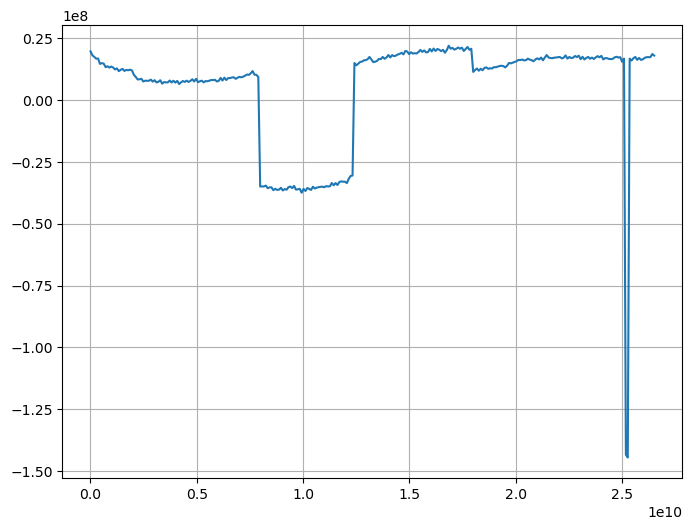

In [22]:
err = np.array(fm)-fr;
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fr, err)
plt.grid(True)

In [23]:
sio.savemat('sweeper_check/frequency_measurement.mat', {'f_commanded':fr, 'f_actual':np.array(fm)})

In [31]:
levels = np.arange(-6, 16)
print(levels)
p = []
sw.setCwFreq(fr[0])
time.sleep(10)
for f in fr:
        ls = []
        sw.setCwFreq(f)
        time.sleep(1)
        for pl in levels:
            sw.setLevel(pl)
            time.sleep(1)
            ls.append(pm.readChannelA(f))
        p.append(ls)
    


[-6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


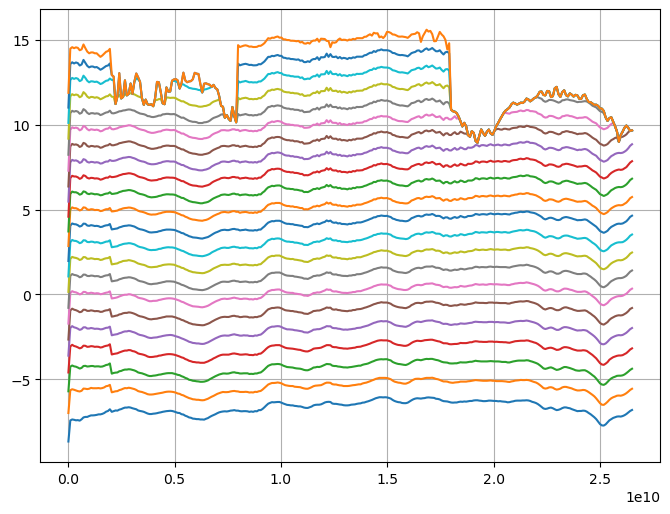

In [34]:
plt.figure(figsize=(8, 6), dpi=100)
plt.plot(fr, p)
plt.grid(True)

In [36]:
sio.savemat('sweeper_check/power_measurement.mat', {'frequency_commanded':fr,'power_commanded':levels, 'power_actual':np.array(p)})